In [24]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

workingdir = './ORCA_M5.5_Zcorr_100km_snr3/'
azi_evlist = 'azi_evlist.txt'


In [33]:
evs = pd.read_csv(workingdir+azi_evlist, delimiter= '\s+', index_col=False)
evs.columns = ["id", "evla", "evlo", "evdp", "mag"]
evs

,id,evla,evlo,evdp,mag
0,201805020632,-24.350000,-111.779999,17.1,5.98
1,201805042233,19.120001,-154.759995,12.0,6.88
2,201805180145,-34.669998,-178.210007,14.3,6.07
3,201806021153,-14.880000,-173.210007,12.0,5.85
4,201806030048,-19.500000,-173.279999,22.5,5.70
5,201806180709,-30.070000,-112.059998,19.4,5.76
6,201806212113,-17.709999,167.889999,42.4,6.16
7,201808121459,69.739998,-144.779999,12.0,6.43
8,201808152156,51.250000,-177.809998,35.8,6.57
9,201808290352,-22.290001,169.820007,17.7,6.90


/Users/russell/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/russell/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1710: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


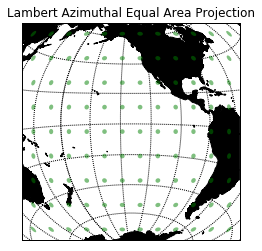

In [2]:
# setup lambert azimuthal equal area basemap.
# lat_ts is latitude of true scale.
# lon_0,lat_0 is central point.
# m = Basemap(width=12000000,height=8000000,
#             resolution='l',projection='laea',\
#             lat_ts=90,lat_0=-5,lon_0=-133.)
skm = 5000
s = skm * 1000 * 3.141592
m = Basemap(projection='laea',lat_0=-5,lon_0=-133,resolution='l',width=s,height=s)
m.drawcoastlines()
m.fillcontinents(color='black',lake_color='black')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='w')
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
for y in np.linspace(m.ymax/20,19*m.ymax/20,9):
    for x in np.linspace(m.xmax/20,19*m.xmax/20,12):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,1.5,100,\
                        facecolor='green',zorder=10,alpha=0.5)
plt.title("Lambert Azimuthal Equal Area Projection")
plt.show()

/Users/russell/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1710: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
/Users/russell/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/russell/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


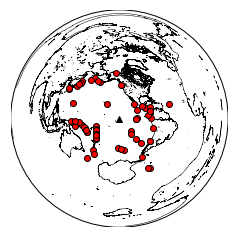

In [30]:
lon_0 = -133; lat_0 = -5

# fig,ax = plt.subplots()

m = Basemap(projection='aeqd',lat_0=lat_0,lon_0=lon_0,resolution='i')
# fill background.
m.drawmapboundary(fill_color='w')
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)

xev,yev=m(evs.evlo.values,evs.evla.values)
m.plot(xev, yev, 'o', color="r",markeredgecolor="black")

# r = 90
# x,y=m(lat_0,lon_0)
# x2,y2 = m(lat_0,lon_0+r) 
# circle1 = plt.Circle((x, y), y2-y, color='red',fill=False)
# ax.add_patch(circle1)

# m.fillcontinents(color='gray',lake_color='gray')
# 20 degree graticule.
# m.drawparallels(np.arange(-80,81,20))
# m.drawmeridians(np.arange(-180,180,20))
# draw a black dot at the center.
xpt, ypt = m(lon_0, lat_0)
m.plot([xpt],[ypt],'k^')
# draw the title.
plt.savefig(workingdir+'events_azi.pdf')
plt.show()

20015077.371242613